# Tutorial 2 - Trending YouTube Videos Part 2
---

<img src="images/trending_videos_header.png" />

<i>This tutorial is based on these Kaggle notebooks: [Extensive USA Youtube](https://www.kaggle.com/kabure/extensive-usa-youtube-eda), [YouTube Trending Videos Analysis](https://www.kaggle.com/ammar111/youtube-trending-videos-analysis).</i>

In the last tutorial, we provided you with clean datasets - however, in reality, this is not always the case. Raw data can often be messy and requires some cleaning before being ready for the analyses. In this context, knowing how to visualize data can further help you with [exploratory data analysis (EDA)](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15). 

In this tutorial, we will continue with the [Trending YouTube Video Statistics dataset](https://www.kaggle.com/datasnaek/youtube-new) to illustrate how to do perform data handing. Please note that the described steps are just an example procedure for this specific dataset. While you can adapt many of these steps to your own projects, keep in mind that the methods that you apply need to be selected and adjusted based on the characteristics of your specific dataset.

Focusing on data handling and visualization, we will illustrate:
- How to do a first inspection of a dataset
- How to remove missing data
- How to import data from a JSON file
- How to impute missing data
- How to use a log transformation
- How to use visualizations to study relationships between variables

Through this notebook we will analyse: 
- Which type of YouTube videos receive how many views, likes, dislikes and comments
- How the different measures are related to one another


## Your tasks
---
1. __First part__: Import the Canadian dataset (CAvideos_mlbd.csv) and perform a first inspection.
2. __Second part__: Remove unimportant missing data from the dataset.
3. __Third part__: Parse a JSON file to add additional information to the dataframe
4. __Fourth part__: Impute missing data
5. __Fifth part__: Visualize data to study relations between measured variables



## Import Python libraries
---
You can find the official documentation of each library here: [Pandas](https://pandas.pydata.org/pandas-docs/stable/), [Numpy](https://numpy.org/doc/), [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/stable/index.html), [JSON](https://docs.python.org/3/library/json.html), [random](https://docs.python.org/3/library/random.html), [missingno](https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import random
import missingno

## Data import and first inspection
---
In the last tutorial, our initial datasets (US and GB) were already clean. Therefore we did not have to do any data cleaning before our analyses. In this tutorial, we will work with the Canadian dataset (CA). 

Work through the following cells to import the data and perform a first inspection.

In [44]:
### EXERCISE CELL ###

# Import data from "CAvideos_mlbd.csv" to pandas dataframe "df_yout"
df_yout = pd.read_csv("CAvideos_mlbd.csv")

In [3]:
### EXERCISE CELL ###

# Examine first rows of the dataframe
df_yout.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0.0,0.0,0.0,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0.0,0.0,0.0,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0.0,0.0,0.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0.0,0.0,0.0,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,0.0,0.0,0.0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25.0,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699.0,103755.0,4613.0,12143.0,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,0.0,0.0,0.0,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23.0,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",-100.0,187464.0,9850.0,26629.0,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,0.0,0.0,0.0,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24.0,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587.0,292837.0,4123.0,36391.0,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,0.0,0.0,0.0,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22.0,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161.0,4135.0,976.0,1484.0,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,0.0,0.0,0.0,Sheldon is roasting pastor of the church\nyoun...


In [4]:
### EXERCISE CELL ###

# Use a pandas function to output a summary of the dataframe describing the columns, datatypes and non-null values of each column 
df_yout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41201 entries, 0 to 41200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                39078 non-null  object 
 1   trending_date           38758 non-null  object 
 2   title                   38758 non-null  object 
 3   channel_title           38758 non-null  object 
 4   category_id             38758 non-null  float64
 5   publish_time            38758 non-null  object 
 6   tags                    38758 non-null  object 
 7   views                   38758 non-null  float64
 8   likes                   38758 non-null  float64
 9   dislikes                38758 non-null  float64
 10  comment_count           38758 non-null  float64
 11  thumbnail_link          38758 non-null  object 
 12  comments_disabled       38758 non-null  float64
 13  ratings_disabled        38758 non-null  float64
 14  video_error_or_removed  38758 non-null

In [5]:
### EXERCISE CELL ###

# Use a pandas function to output some descriptive statistics about the data (mean, std, min, max, quartiles etc.)
df_yout.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,38758.000000,3.875800e+04,3.875800e+04,3.875800e+04,3.875800e+04,38758.000000,38758.000000,38758.000000
mean,20.897982,1.053351e+06,3.718998e+04,1.900256e+03,4.733066e+03,0.014010,0.007147,0.000697
std,6.713913,3.337582e+06,1.316739e+05,1.936540e+04,2.130120e+04,0.117533,0.084238,0.026385
min,1.000000,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,20.000000,1.313488e+05,2.077000e+03,9.300000e+01,3.950000e+02,0.000000,0.000000,0.000000
50%,24.000000,3.365710e+05,8.099500e+03,2.790000e+02,1.223000e+03,0.000000,0.000000,0.000000
75%,24.000000,8.504108e+05,2.598000e+04,8.580000e+02,3.424000e+03,0.000000,0.000000,0.000000
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,1.000000,1.000000,1.000000


__Question:__ Based on a first inspection of the above cells, do we need to do some data cleaning? If yes, why? If no, why not?

Put your answer in the cell below.

In [6]:
### EXERCISE CELL ###

# In contrast to the US and the GB datasets, this one requires some cleaning because: 
    # 1. There is a fraction of videos that were flagges as having errors or have been removed (column video_error_or_removed). Maybe we should consider to exlude those.
    # 2. As it can be seen from the info() function, the dataframe has 41201 rows, but not all of them contain values. So there are some rows with incomplete data.
    # 3. From the describe() function it can also be observed that the minimum value for views is -100. This is strange and should be further investigated.
# If the head() function is given the parameter to show 10 instead of only 5 entries, two of the above mentioned issues can be observed on two examples (indices 6 and 7)

## Removing data
---

The "easiest way" to deal with missing data is to remove them. However, before doing so, it should be investigated whether it is reasonable to remove this data. Often, removing is not the best choice because it will reduce statistical power of the data set and potentially introduce a bias. Nevertheless, in some cases, data can be removed without issues. In the following, we will present some of these cases.

### Videos flagged as having errors or have been removed

Let's first look at the videos that are already flagged to have issues by the dataset itself (column video_error_or removed).

In [7]:
# Display all the videos that had errors or were removed
df_yout[df_yout['video_error_or_removed'] == 1]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4394,bUjlYfYDoeA,17.05.12,Deleted video,CBCDrama,24.0,2017-12-04T17:59:35.000Z,"سابع جار|""مسلسل سابع جار""|""sab3 gar""|""سابع جار...",431929.0,2545.0,264.0,1016.0,https://i.ytimg.com/vi/wpAmlGiQbiE/default.jpg,0.0,0.0,1.0,مسلسل سابع جار | الحلقة الرابعة والثلاثون | 34...
10306,4PD8dRaM8Uc,18.04.01,Deleted video,SET India,24.0,2018-01-02T17:27:04.000Z,"true events|""extramarital affair""|""fight""|""set...",208914.0,1026.0,132.0,114.0,https://i.ytimg.com/vi/hbw2IQCRlDk/default.jpg,0.0,0.0,1.0,Click here to subscribe to SonyLIV: http://www...
10596,LJsbf7KNVCA,18.05.01,Deleted video,Torontomapleleafs951,17.0,2018-01-05T00:16:47.000Z,"Joe Thornton|""fights""|""Nazem Kadri""|""Toronto M...",17584.0,50.0,7.0,45.0,https://i.ytimg.com/vi/n4YzfOI_LEI/default.jpg,0.0,0.0,1.0,Joe Thornton fights Nazem Kadri - Sharks vs Le...
12063,7qmSwj8Pwys,18.15.01,Deleted video,PewDiePie,23.0,2018-01-13T18:46:44.000Z,"pewdiepie|""mad lad""",3954942.0,344105.0,7173.0,31539.0,https://i.ytimg.com/vi/RkvczNWh9ZM/default.jpg,0.0,0.0,1.0,|AD| Shop and save on the HONOR 7X Lucky Bag p...
15394,SOeGkrOx0iA,18.31.01,Deleted video,Comedy Central UK,23.0,2018-01-30T12:20:27.000Z,"comedy central|""comedy central uk""|""the daily ...",426346.0,5458.0,332.0,670.0,https://i.ytimg.com/vi/ofRoCRKVMrw/default.jpg,0.0,0.0,1.0,President Trump chats with his old pal and Cel...
15488,0yE2ORkLxoA,18.01.02,Deleted video,Balitang Pinoy,22.0,2018-01-29T09:24:16.000Z,[none],148917.0,531.0,152.0,761.0,https://i.ytimg.com/vi/NTZkqSbxJx0/default.jpg,0.0,0.0,1.0,"SENATE HEARING January 29, 2018 | Sen. Dick Go..."
15491,UCSmH6OLPC4,18.01.02,Deleted video,The Graham Norton Show,24.0,2018-01-29T14:14:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",321018.0,6008.0,62.0,399.0,https://i.ytimg.com/vi/fZcQah57jnY/default.jpg,0.0,0.0,1.0,...Welcome to Mission\nSubscribe for weekly up...
15756,BKHNOxqsSiM,18.02.02,Deleted video,Geek & Sundry,24.0,2018-01-31T19:08:26.000Z,"geek and sundry|""geek & sundry""|""felicia day""|...",37562.0,0.0,0.0,0.0,https://i.ytimg.com/vi/Onc2w3Vyj_8/default_liv...,0.0,0.0,1.0,Voice actor Matthew Mercer leads a group of fe...
15795,nx0RGHtP15U,18.02.02,Deleted video,Kia Motors America,2.0,2018-02-01T10:52:21.000Z,"Steven tyler|""fueled by youth""|""big game ad""|""...",206006.0,1530.0,69.0,212.0,https://i.ytimg.com/vi/0YVbVXOjJv4/default.jpg,0.0,0.0,1.0,"With 365 horsepower, the new 2018 Kia Stinger ..."
16229,Ub_oaMgiWvw,18.04.02,Deleted video,TRUSTED MEDIA,22.0,2018-02-02T20:00:09.000Z,"Ben Shapiro REACTS|""The Memo is Out""|""ben shap...",111203.0,1986.0,86.0,609.0,https://i.ytimg.com/vi/Y9PEqZHdXrI/default.jpg,0.0,0.0,1.0,The Memo is Out - Ben Shapiro REACTS\n\nCredit...


We can see there is a small number of entries that were flagged with having errors or being removed. Some of them don't even have proper video titles. We don't know exactly why these videos were flagged, but to be safe and given that this subset is considerably small with respect to the entire set, we can remove these entries. Let's do this.

__Hint:__ Use pandas drop function. 

In [8]:
### EXERCISE CELL ###

# Remove flagged videos from the dataset

# Find indices of concerned videos
index_names = df_yout[df_yout['video_error_or_removed'] == 1].index

# Remove rows with these indices from the dataframe
df_yout = df_yout.drop(index_names)

In [9]:
# Check if videos were sucessfully removed
df_yout[df_yout['video_error_or_removed'] == 1]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


### Visualizing missing data

Next, let's have a closer look at the missing data in our dataset. Using the info() function we have seen that the columns sometimes contain empty values. To facilitate the anaylsis of this missing data, we will use the [missingno](https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python) library, that provides us with a very useful way to visualize missing data.

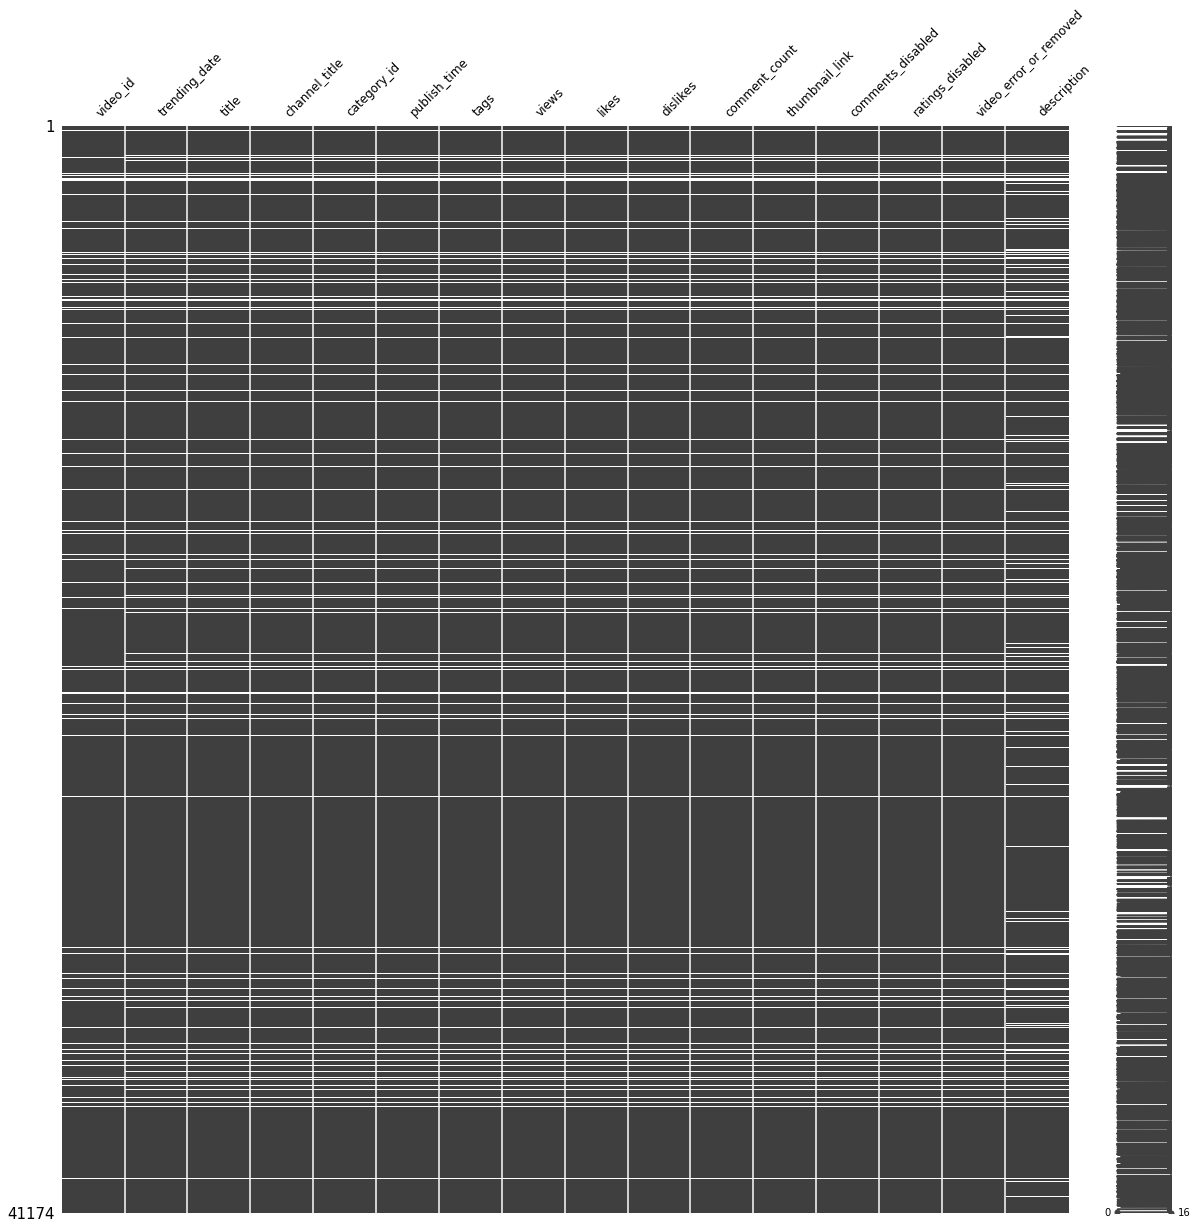

In [10]:
# Use missingno library to visualize empty cells in the dataframe
missingno.matrix(df_yout,figsize=(20,20), fontsize=12)

__Question:__ From the missingno graph, which "types" of missing data can you identify?

Put your answer in the cell below.

In [11]:
### EXERCISE CELL ###

# From the missingno graph we can identify three types of missing data:
    # 1. There are rows for which all columns are empty
    # 2. There are rows for which all columns are empty except for the video_id column
    # 3. There are rows for which only the description column in empty
# While the latter can be considered reasonable, we should take a closer look at the first two and see if this data should be cleaned.

### Empty rows

Let's now have a look at the rows with only empty values.

In [12]:
# Display rows with all empty values
df_yout[df_yout.isna().all(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are 2123 rows that are completely empty. For this kind of data, there is no problem with removing it. Let's do this.

__Hint:__ Use pandas dropna() function, but be careful to specify the correct parameters.

In [13]:
### EXERCISE CELL ###

# Remove rows with these indices from the dataframe
df_yout = df_yout.dropna(axis=0,how='all')

In [14]:
# Check if completely empty rows were removed 
df_yout[df_yout.isna().all(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


### Rows with only video_id

Let's now have a look at the rows with only values for video_id and empty values for all other columns.

In [15]:
# Display rows with empty values for treding_date
df_yout[df_yout['trending_date'].isna()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
1152,\nSubscribe to WWE on YouTube: http://bit.ly/1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1153,\nVisit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154,\nMust-See WWE videos on YouTube: https://goo....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1331,\nChris Tyson - Kickin Sh*t (Prod by Audio Car...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1332,\nChris Tyson - Kickin Sh*t (Prod by Audio Car...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40867,Must-See WWE videos on YouTube: https://goo.gl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40969,Support The Young Turks by Subscribing http://...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40970,Like Us on Facebook: http://www.facebook.com/T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40971,Follow Us on Twitter: http://www.twitter.com/T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are another 320 rows where data is missing for all columns except for video_id. But also the video_id column does not look meaningful. It seems that with these rows there was something wrong during the data collection. Therefore, we can also remove this data.

In [16]:
### EXERCISE CELL ###

# Remove videos with only video_ids

# Find indices of concerned videos
index_names = df_yout[df_yout['trending_date'].isna()].index

# Remove rows with these indices from the dataframe
df_yout = df_yout.drop(index_names)

In [17]:
# Check if data was removed
df_yout[df_yout['trending_date'].isna()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38731 entries, 0 to 41200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38731 non-null  object 
 1   trending_date           38731 non-null  object 
 2   title                   38731 non-null  object 
 3   channel_title           38731 non-null  object 
 4   category_id             38731 non-null  float64
 5   publish_time            38731 non-null  object 
 6   tags                    38731 non-null  object 
 7   views                   38731 non-null  float64
 8   likes                   38731 non-null  float64
 9   dislikes                38731 non-null  float64
 10  comment_count           38731 non-null  float64
 11  thumbnail_link          38731 non-null  object 
 12  comments_disabled       38731 non-null  float64
 13  ratings_disabled        38731 non-null  float64
 14  video_error_or_removed  38731 non-null

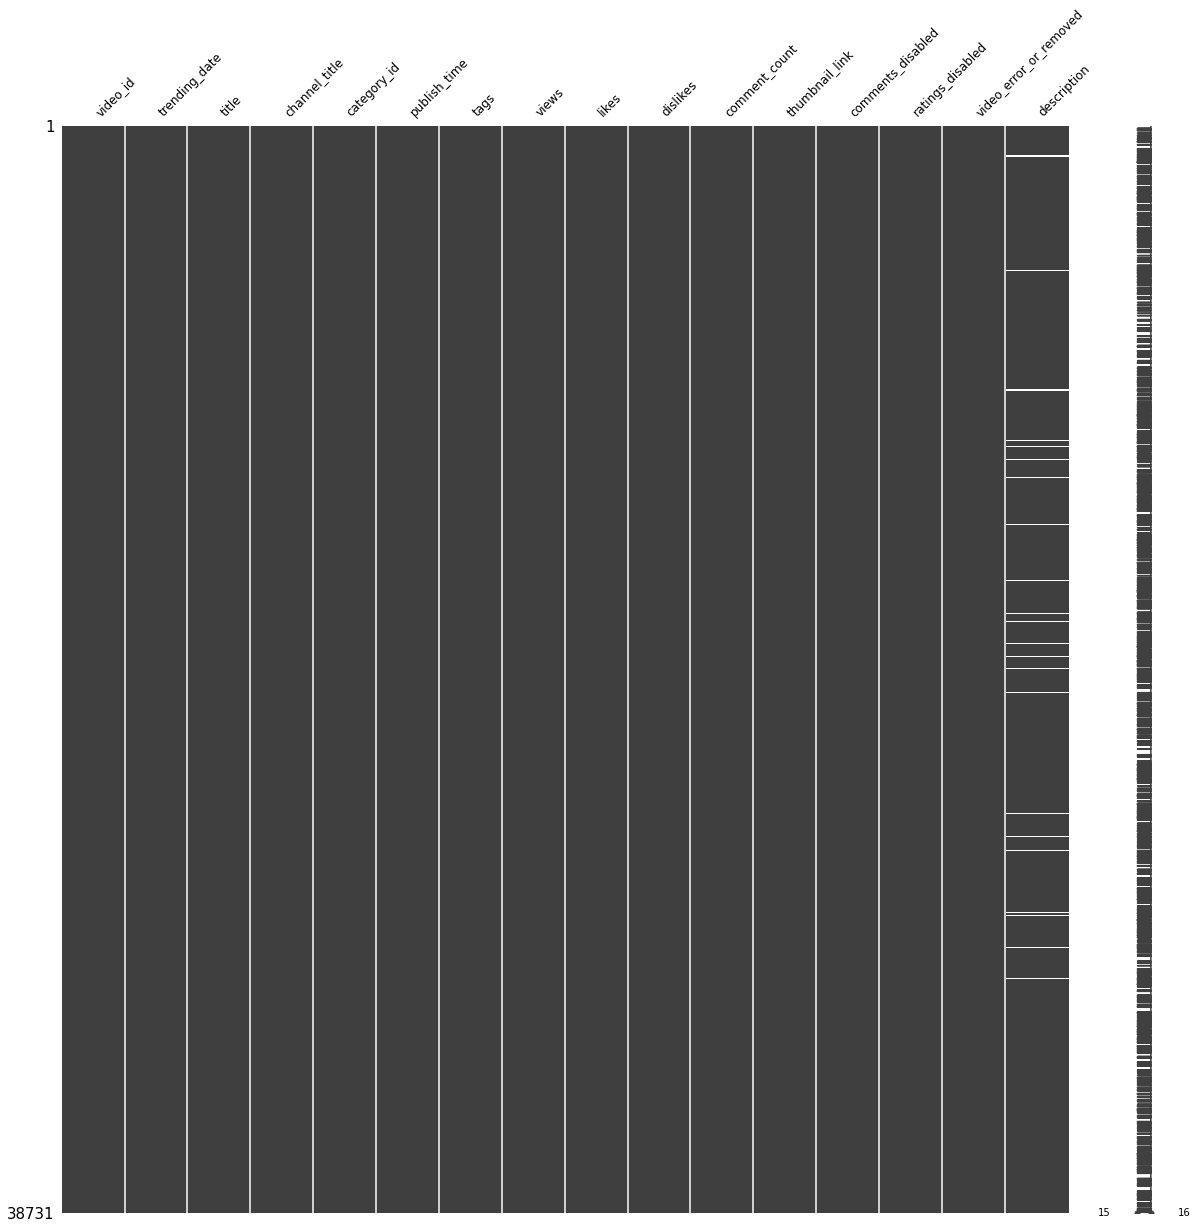

In [18]:
# Final check if there are still empty cells in the dataset
df_yout.info()
missingno.matrix(df_yout,figsize=(20,20), fontsize=12)

Now we're left only with rows that have values in all columns. The only exeception is the description column, but here it is possible to have a few empty values, since not all YouTube videos always include a description.

## Adding category names from JSON files
---
Before we continue with the data cleaning, let's add the category names to the dataframe - doing this will facilitate the next steps.

If you remember well, in the last tutorial we added the category names by manually assigning them to the dataframe. In this tutorial we would like to illustrate how we can do the same by parsing the information from the JSON file supporting the dataset.
Before you dive into the code, try to open the JSON file to get a feeling of how it is structured. There are many offline and online JSON viewers available. A list of examples can be found [here](https://prowebscraper.com/blog/best-json-viewer-tools-compared-for-developers/). In Noto, you can also view the file by just doubleclicking on it. 

Knowing how to parse data from JSON files is useful, because in many cases your main dataset can also be stored as JSON files.

In the following, we will use a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), a Python data structure which often can be quite helpful.

In [19]:
# Create an empty dictionary
category_id = {}

# Open supporting JSON file
with open('CA_category_id.json', 'r') as f:
    data = json.load(f)
    # Fill dictionary with relevant information from the JSON file
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']
        
category_id

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

As you can see, we created a dictionary associating the category_id with the corresponding category names based on the information from the JSON. Now we just need to integrate that information in our dataframe. 

__Hint 1:__ Use pandas map() function

__Hint 2:__ Note that the numbers from the dictionary don't have decimals, while our category_id column has. In this case the mapping will not work. Therefore, we will first convert category_id to int to remove the decimals.



In [20]:
### EXERCISE CELL ###

# Convert category_id column to int
df_yout['category_id'] = df_yout['category_id'].astype(int)
# Create new category_name column with values from category_id but converted to string
df_yout['category_name'] = df_yout['category_id'].astype(str)
# Map the values using the dictionary
df_yout['category_name'] = df_yout['category_name'].map(category_id)

In [21]:
# Check if category_name column was inserted correctly
df_yout.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0.0,0.0,0.0,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0.0,0.0,0.0,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0.0,0.0,0.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


## Data imputation
---

Let's now continue with the data cleaning and investigate why the minimum of the views was indicated as -100. Negative values for views don't make sense, so let's see how we can replace them with more reasonable values.

### Imputation of missing views data

Let's first take a look at the concerned rows of videos that are missing the views data.

In [22]:
### EXERCISE CELL ###

# Display all rows with negative values for views 
df_yout[df_yout['views'] < 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",-100.0,187464.0,9850.0,26629.0,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,0.0,0.0,0.0,Vanoss Merch Shop: https://vanoss.3blackdot.co...,Comedy
51,teXaL6GdQRk,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes|""Jokes de Papa""|""Stranger Thing...",-100.0,14354.0,202.0,417.0,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,0.0,0.0,0.0,Contenu commandité par Netflix France.\nInspir...,Comedy
54,Nc0ZCtZdgAk,17.14.11,KOKE (Full Video) | SUNANDA SHARMA | Latest Pu...,Amar Audio,10,2017-11-13T12:43:11.000Z,"Koke|""Koke Sunanda Sharma""|""Latest Punjabi Son...",-100.0,37121.0,2100.0,1667.0,https://i.ytimg.com/vi/Nc0ZCtZdgAk/default.jpg,0.0,0.0,0.0,Pinky Dhaliwal Presents New Punjabi Song KOKE ...,Music
201,ItYOdWRo0JY,17.15.11,Selling My iPhone X To a Machine at Walmart,TechSmartt,28,2017-11-14T00:45:15.000Z,"iphone x|""iphone 10""|""iphone""|""walmart""|""techs...",-100.0,28647.0,17819.0,7860.0,https://i.ytimg.com/vi/ItYOdWRo0JY/default.jpg,0.0,0.0,0.0,I saw the EcoATM phone machine at Walmart and ...,Science & Technology
202,gjXrm2Q-te4,17.15.11,Jimmy Fallon Pays Tribute to His Mother Gloria,The Tonight Show Starring Jimmy Fallon,23,2017-11-14T04:55:24.000Z,"Jimmy Fallon|""Tonight Show Starring Jimmy Fall...",-100.0,58474.0,837.0,3294.0,https://i.ytimg.com/vi/gjXrm2Q-te4/default.jpg,0.0,0.0,0.0,"Jimmy celebrates the life and love of his mom,...",Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39997,36QMyiRAv-Y,18.09.06,Jaiden & Boyinaband - Empty (Official Music Vi...,Jaiden Animations,1,2018-06-08T19:08:21.000Z,"jaiden|""animations""|""jaidenanimation""|""jaidena...",-100.0,196703.0,2832.0,56393.0,https://i.ytimg.com/vi/36QMyiRAv-Y/default.jpg,0.0,0.0,0.0,Thanks to Dave for approaching me with this id...,Film & Animation
40012,vUEFdWAKpf0,18.09.06,Anthony Bourdain - Our last full interview,Fast Company,25,2018-06-08T23:00:41.000Z,"fast company|""anthony bourdain""|""CNN Parts Unk...",-100.0,2060.0,43.0,868.0,https://i.ytimg.com/vi/vUEFdWAKpf0/default.jpg,0.0,0.0,0.0,An adventurous documenter of international foo...,News & Politics
40031,3A8iPnSkM2A,18.09.06,What the HELL is Totally Spies? (Hidden Meaning),Saberspark,24,2018-06-08T16:00:22.000Z,"saberspark|""saber""|""totally spies""|""weird epis...",-100.0,15990.0,645.0,5371.0,https://i.ytimg.com/vi/3A8iPnSkM2A/default.jpg,0.0,0.0,0.0,Get a 30-day free trial of the VRV Premium at ...,Entertainment
40209,64UX1npgRkI,18.10.06,Sanju: Kar Har Maidaan Fateh | Ranbir Kapoor |...,T-Series,10,2018-06-10T05:31:55.000Z,"Kar Har Maidaan Fateh|""kar har maidan fateh""|""...",-100.0,174930.0,4499.0,13464.0,https://i.ytimg.com/vi/64UX1npgRkI/default.jpg,0.0,0.0,0.0,"In the darkest of moments, it’s often your fam...",Music


It seems that we have 499 rows for which the data for views is invalid. How should we handle these values? Since all the other columns seem to contain valuable data, it would not make sense to just delete the rows like we did before. Instead, we could try to find ways to replace these invalid values by more resonable ones. This process is called __imputation__ and there are multiple ways to this. A summary of different methods can for instance, be found [here](https://www.researchgate.net/publication/49660163_Best_Practices_for_Missing_Data_Management_in_Counseling_Psychology).

Note that there is not ONE optimal method for data imputation. Which method to apply, strongly depends on your data. Therefore, it is crucial to gain as much knowledge as possible about the missing data in order to select appropriate methods.

In the following, we will perform different analyses to find out, what could be a meaningful way to impute missing data _for this specific dataset_. With respect to the methods in the above-mentioned reference, the method applied here can be classified as a mix of pattern-matching imputation and regression substitution.

Let's check if the subset of data with missing views is substantially different from the rest.

In [23]:
# Extract subset with negative values for views
df_negatives = df_yout[df_yout['views'] < 0]
# Extract subset without negative values for views
df_rest = df_yout[df_yout['views'] >= 0]

In [24]:
# Display descriptive statistics for df_negatives
df_negatives.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,499.000000,499.0,4.990000e+02,499.000000,499.000000,499.000000,499.000000,499.0
mean,17.440882,-100.0,1.132923e+05,5010.444890,14401.420842,0.026052,0.006012,0.0
std,8.120454,0.0,2.565389e+05,24291.702391,45290.251219,0.159450,0.077381,0.0
min,1.000000,-100.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,10.000000,-100.0,1.092500e+04,303.000000,1127.000000,0.000000,0.000000,0.0
50%,22.000000,-100.0,3.966200e+04,987.000000,4558.000000,0.000000,0.000000,0.0
75%,24.000000,-100.0,1.211110e+05,3013.000000,13557.500000,0.000000,0.000000,0.0
max,30.000000,-100.0,3.880074e+06,483943.000000,692311.000000,1.000000,1.000000,0.0


In [25]:
# Display descriptive statistics for df_rest
df_rest.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,38232.000000,3.823200e+04,3.823200e+04,3.823200e+04,3.823200e+04,38232.000000,38232.000000,38232.0
mean,20.948760,1.066879e+06,3.618789e+04,1.859253e+03,4.604809e+03,0.013863,0.007167,0.0
std,6.674543,3.357775e+06,1.289861e+05,1.929631e+04,2.078244e+04,0.116923,0.084354,0.0
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
25%,20.000000,1.370532e+05,2.053750e+03,9.200000e+01,3.910000e+02,0.000000,0.000000,0.0
50%,24.000000,3.437655e+05,7.950000e+03,2.750000e+02,1.210000e+03,0.000000,0.000000,0.0
75%,24.000000,8.632150e+05,2.533525e+04,8.410000e+02,3.350000e+03,0.000000,0.000000,0.0
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,1.000000,1.000000,0.0


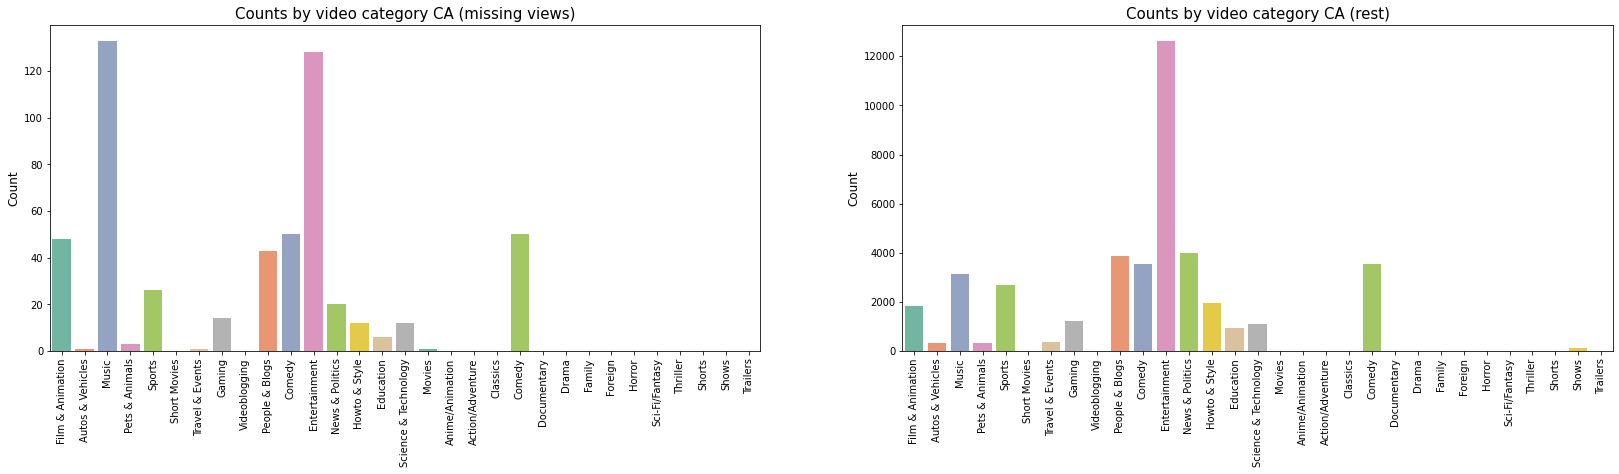

In [26]:
# Plot distribution of video categories for both subsets (taken from Tutorial 1.2)

plt.figure(figsize = (28,6))

order_categories = category_id.values()

plt.subplot(121)
g = sns.countplot(x=df_negatives['category_name'], palette="Set2", order=order_categories)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Counts by video category CA (missing views)", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
#g.set(ylim=(0, 15000))

plt.subplot(122)
g = sns.countplot(x=df_rest['category_name'], palette="Set2", order=order_categories)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Counts by video category CA (rest)", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
#g.set(ylim=(0, 15000))

plt.show()


The descriptive statistics for both subgroups show some differences - however, given that the samples in both subsets are very different (499 vs 38232), it is difficult to draw some conclusions. The distribution of categories in both subsets are overall similar, with the difference that the music category is much higher presented in the subset with missing views. Removing this data could therefore introduce a bias. But as mentioned before, the subset with missing views is much smaller than the other subset, therefore, it is hard to conclude if there is some pattern in the missing data. Nevertheless, we can still try to find out how to impute the missing data. 

To select a proper imputation methos. let's take a closer look at the subset of videos with missing views. Are the videos all different?

In [27]:
# Use the nunique function to determine if the videos in df_negatives are all different
df_negatives.nunique()

video_id                  499
trending_date             167
title                     499
channel_title             352
category_id                16
publish_time              499
tags                      474
views                       1
likes                     494
dislikes                  461
comment_count             481
thumbnail_link            499
comments_disabled           2
ratings_disabled            2
video_error_or_removed      1
description               483
category_name              15
dtype: int64

It can be observed that from the 499 rows, we have 499 unique video_ids, i.e. the videos with missing views are all different. Remember that from the last tutorial we observed that most videos are trending for multiple days. Maybe we can infer the missing data from the other trending days of the same video? Let's look at the all the entries for a random video in df_negatives.

In [28]:
# Choose one video from df_negatives at random and display all entries of this video in df_yout - implemented in a way such that it can easily be rerun it for several videos one after the other.
df_example = df_yout[df_yout.video_id == df_negatives.iloc[random.randint(1,500)]['video_id']].reset_index()
display(df_example)

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,534,ZptISqiTxsQ,17.16.11,Gotta See It: Chaotic bench brawl erupts betwe...,SPORTSNET,17,2017-11-16T03:23:01.000Z,"Sportsnet|""Sports""|""Canada""|""calgary flames""|""...",-100.0,517.0,9.0,327.0,https://i.ytimg.com/vi/ZptISqiTxsQ/default.jpg,0.0,0.0,0.0,The Calgary Flames and Detroit Red Wings got i...,Sports
1,621,ZptISqiTxsQ,17.17.11,Gotta See It: Chaotic bench brawl erupts betwe...,SPORTSNET,17,2017-11-16T03:23:01.000Z,"Sportsnet|""Sports""|""Canada""|""calgary flames""|""...",392458.0,1467.0,54.0,743.0,https://i.ytimg.com/vi/ZptISqiTxsQ/default.jpg,0.0,0.0,0.0,The Calgary Flames and Detroit Red Wings got i...,Sports
2,805,ZptISqiTxsQ,17.18.11,Gotta See It: Chaotic bench brawl erupts betwe...,SPORTSNET,17,2017-11-16T03:23:01.000Z,"Sportsnet|""Sports""|""Canada""|""calgary flames""|""...",517275.0,1912.0,85.0,910.0,https://i.ytimg.com/vi/ZptISqiTxsQ/default.jpg,0.0,0.0,0.0,The Calgary Flames and Detroit Red Wings got i...,Sports
3,1019,ZptISqiTxsQ,17.19.11,Gotta See It: Chaotic bench brawl erupts betwe...,SPORTSNET,17,2017-11-16T03:23:01.000Z,"Sportsnet|""Sports""|""Canada""|""calgary flames""|""...",581541.0,2234.0,105.0,951.0,https://i.ytimg.com/vi/ZptISqiTxsQ/default.jpg,0.0,0.0,0.0,The Calgary Flames and Detroit Red Wings got i...,Sports
4,1252,ZptISqiTxsQ,17.20.11,Gotta See It: Chaotic bench brawl erupts betwe...,SPORTSNET,17,2017-11-16T03:23:01.000Z,"Sportsnet|""Sports""|""Canada""|""calgary flames""|""...",609245.0,2323.0,114.0,974.0,https://i.ytimg.com/vi/ZptISqiTxsQ/default.jpg,0.0,0.0,0.0,The Calgary Flames and Detroit Red Wings got i...,Sports


If you run the above cell multiple times for different videos, you can see that for all videos, there are multiple entries in df_yout. It is always the first one (earliest date) that is missing the views, while the subsequent ones all have meaningful values. Maybe we can use these values to infer the one that is missing? Let's try to visualize the views for the example chosen above:

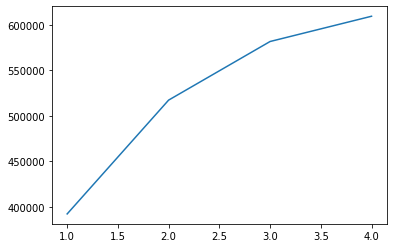

In [29]:
### EXERCISE CELL ###

# Plot the values for views for all entries of the video except the first one
a = df_example.iloc[1:,8].plot()

If you have plotted the views for several examples, you can see that views are increasing with their trending days (which is quite logical). So we know that the missing value for the first entry is probably lower than all the others. How can we estimate that value? As it can be observed from the graphs, one reasonable method could be linear regression. In Python, this can be very easily implemented using the [scikit-learn library](https://scikit-learn.org/stable/index.html).

The following steps can also be found this basic tutorial: https://realpython.com/linear-regression-in-python/

In [30]:
# Import linear regression models from scikit-learn
from sklearn.linear_model import LinearRegression

In [31]:
# Define regressors x and predictors y based on data from example video
x = np.arange(1,df_example.shape[0]).reshape((-1, 1))
y = np.array(df_example.iloc[1:,8])

# Define model
model = LinearRegression().fit(x, y)

# Output model parameters
print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Estimate missing views value (of course we could have also just directly use the value of model.intercept, since we are estimating the value at 0)
views_est = model.predict(np.array([0]).reshape((-1, 1)))
print('estimate for missing views value:', views_est)

coefficient of determination: 0.9145267290103659
intercept: 346473.0
slope: [71462.7]
estimate for missing views value: [346473.]


Now that we have found a reasonable solution to imputate the missing views data, we just have to implement it for all the videos with missing views values in df_yout.

In [32]:
### EXERCISE CELL ###

# Iterate over all rows of df_negatives and impute values
for index, videoname in df_negatives['video_id'].items():
    
    # Find all videos with the same video_id
    df_temp = df_yout[df_yout.video_id == videoname]
    # Find index of entry with negative values
    idx_insert = df_temp.loc[(df_yout['views'] < 0)].index
    # Calculate estimate for missing views value
    x = np.arange(1,df_example.shape[0]).reshape((-1, 1))
    y = np.array(df_example.iloc[1:,8])
    model = LinearRegression().fit(x, y)
    
    # Replace negative values with means
    df_yout.at[idx_insert,'views'] = model.intercept_

Now let's check if our manipulations worked:

In [33]:
# Display all rows with views smaller than 0
df_yout.loc[df_yout['views'] < 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name


In [34]:
# Display descriptive statistics for clean dataset
df_yout.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,38731.000000,3.873100e+04,3.873100e+04,3.873100e+04,3.873100e+04,38731.000000,38731.000000,38731.0
mean,20.903566,1.057598e+06,3.718128e+04,1.899852e+03,4.731026e+03,0.014020,0.007152,0.0
std,6.706708,3.337063e+06,1.317000e+05,1.937173e+04,2.130588e+04,0.117574,0.084267,0.0
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
25%,20.000000,1.386950e+05,2.078000e+03,9.300000e+01,3.950000e+02,0.000000,0.000000,0.0
50%,24.000000,3.464730e+05,8.100000e+03,2.790000e+02,1.223000e+03,0.000000,0.000000,0.0
75%,24.000000,8.500715e+05,2.596900e+04,8.580000e+02,3.423000e+03,0.000000,0.000000,0.0
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,1.000000,1.000000,0.0


There are no rows with negative entries views left and the minimums for the views columns now also seems to be reasonable. 

We can now move on the the last part of this tutorial.

## Data visualizations
---
Let's now analyze the clean dataset by looking at the overall distributions of views, likes, dislikes and comments. 

### Distribution of views, likes, dislikes and comments

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

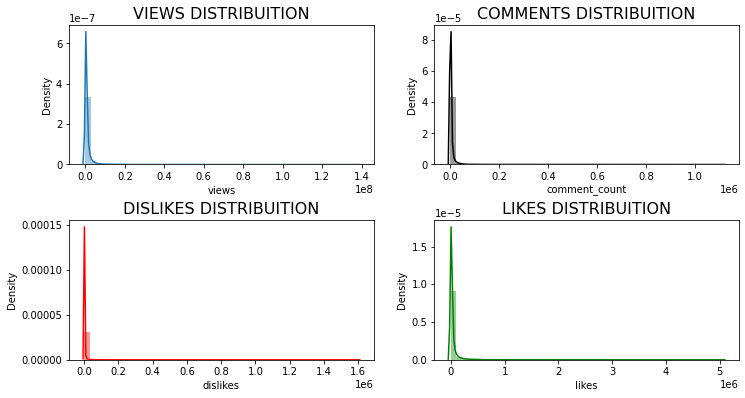

In [35]:
# Create a new figure with a width of 12 and a height of 6
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.distplot(df_yout['views'])
g1.set_title("VIEWS DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes'],color='green')
g2.set_title('LIKES DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes'], color='r')
g3.set_title("DISLIKES DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_count'], color='k')
g4.set_title("COMMENTS DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

We can see that all the plots are very right skewed. This will have an effect on data visualizations later on. One way to correct for this is to apply a [log transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9).

In [36]:
# Create new columns with transformed values using the Numpy log function.
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['views'] + 1)
df_yout['dislikes_log'] = np.log(df_yout['dislikes'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)

__Question:__ Why do we add 1 in each transformation?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

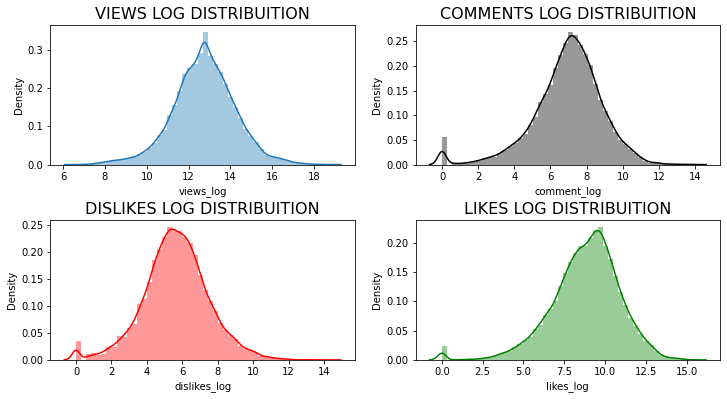

In [37]:
# Create new distribution plots with transformed data
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'], color='k')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Views by category

Let's now plot the views by category using [Seaborn's boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function. To see the effect of the log transformation, plot the data of the original views values in one subplot and the log transformed data in another subplot next to it.  


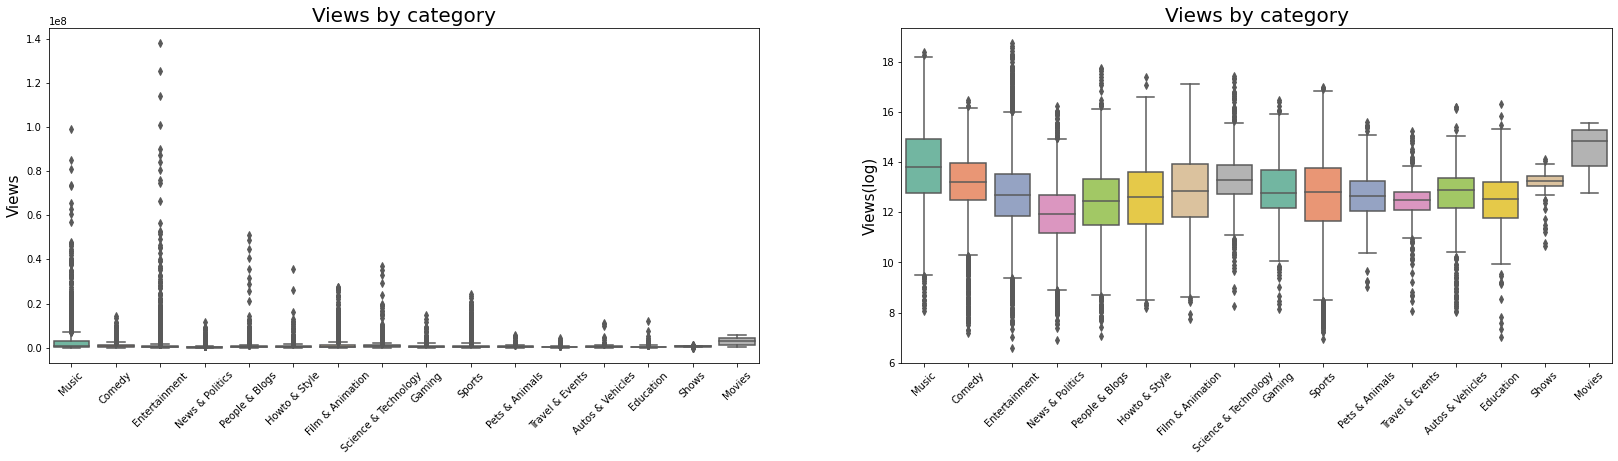

In [38]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
plt.figure(figsize = (28,6))

plt.subplot(121)
g1 = sns.boxplot(x='category_name', y='views', data=df_yout, palette="Set2")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Views by category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views", fontsize=15)

plt.subplot(122)
g2 = sns.boxplot(x='category_name', y='views_log', data=df_yout, palette="Set2")
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Views by category", fontsize=20)
g2.set_xlabel("", fontsize=15)
g2.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Likes by category

Now do the same for the likes.

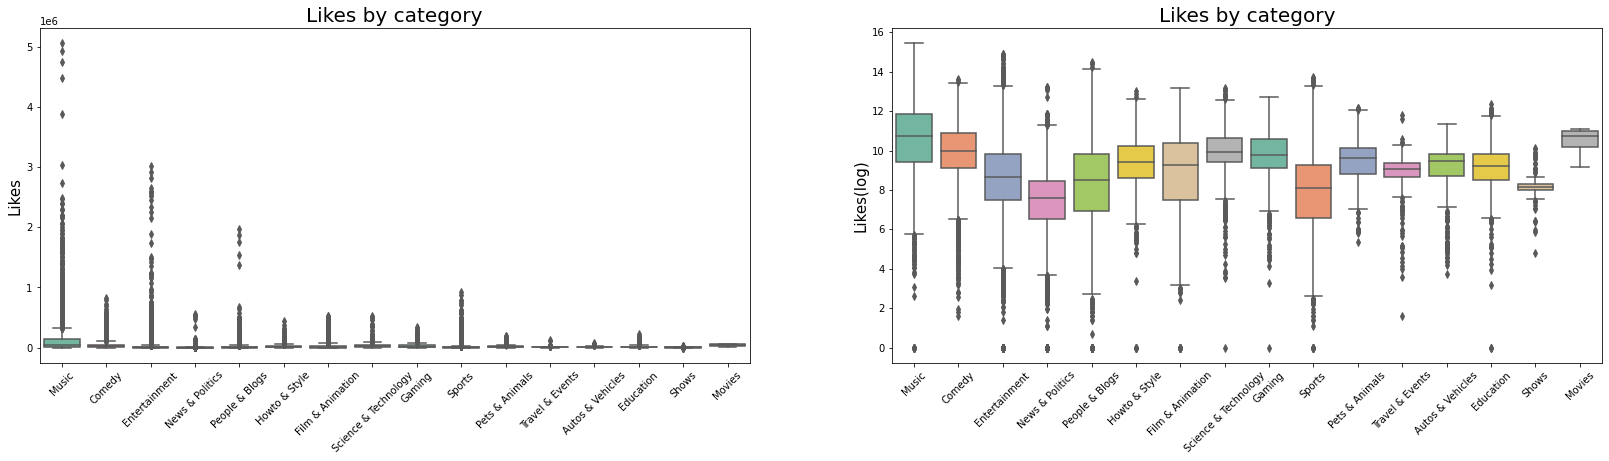

In [39]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
plt.figure(figsize = (28,6))

plt.subplot(121)
g1 = sns.boxplot(x='category_name', y='likes', data=df_yout, palette="Set2")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Likes by category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Likes", fontsize=15)

plt.subplot(122)
g2 = sns.boxplot(x='category_name', y='likes_log', data=df_yout, palette="Set2")
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Likes by category", fontsize=20)
g2.set_xlabel("", fontsize=15)
g2.set_ylabel("Likes(log)", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Dislikes by category</h3>

Now do the same for the dislikes.

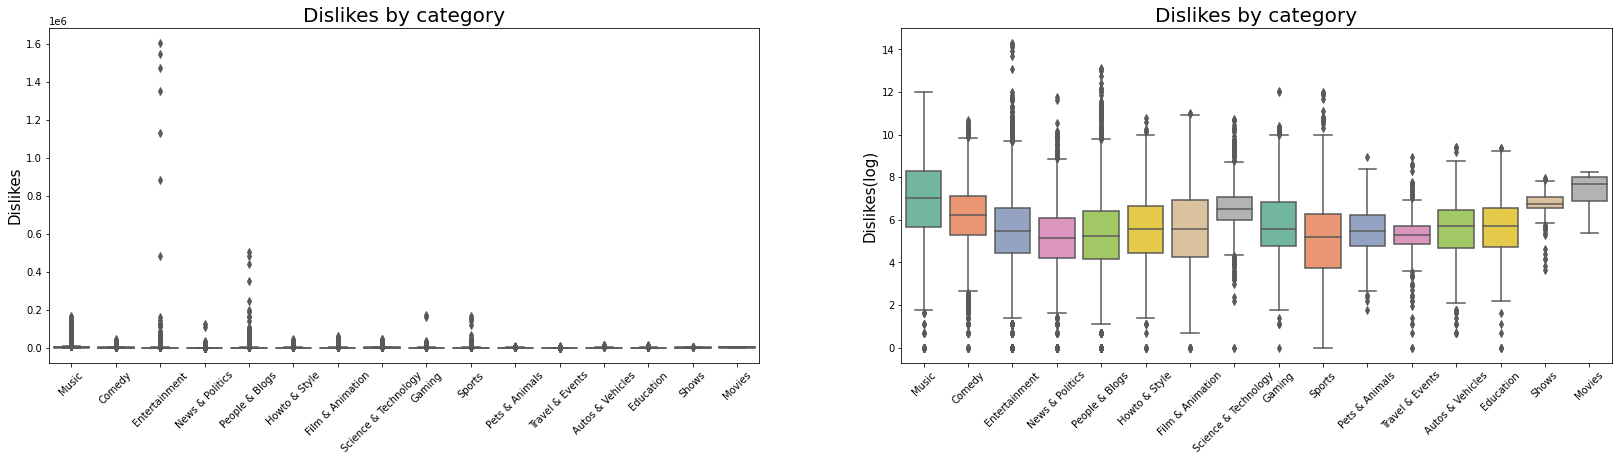

In [40]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
plt.figure(figsize = (28,6))

plt.subplot(121)
g1 = sns.boxplot(x='category_name', y='dislikes', data=df_yout, palette="Set2")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Dislikes by category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Dislikes", fontsize=15)

plt.subplot(122)
g2 = sns.boxplot(x='category_name', y='dislikes_log', data=df_yout, palette="Set2")
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Dislikes by category", fontsize=20)
g2.set_xlabel("", fontsize=15)
g2.set_ylabel("Dislikes(log)", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Comments by category

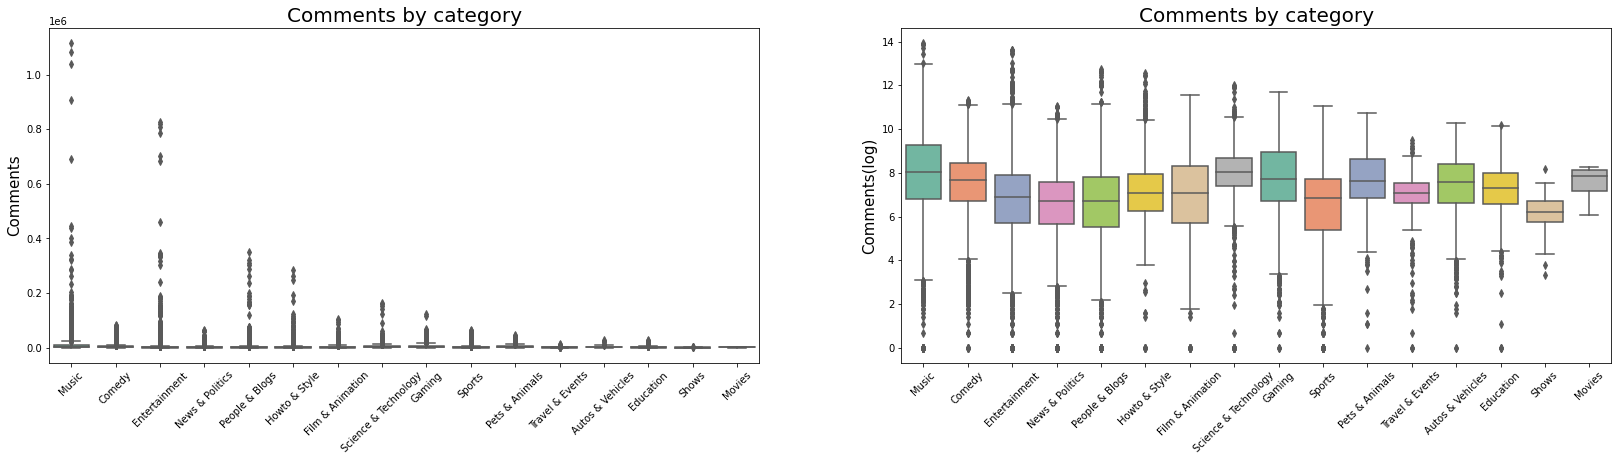

In [41]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
plt.figure(figsize = (28,6))

plt.subplot(121)
g1 = sns.boxplot(x='category_name', y='comment_count', data=df_yout, palette="Set2")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Comments by category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Comments", fontsize=15)

plt.subplot(122)
g2 = sns.boxplot(x='category_name', y='comment_log', data=df_yout, palette="Set2")
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Comments by category", fontsize=20)
g2.set_xlabel("", fontsize=15)
g2.set_ylabel("Comments(log)", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

You can see that the log transformation helped to visualize some of the differences between categories which would be harder to observe in the original (skewed) data. For instance, it can be seen, that videos from the Movies category have more views and receive more likes than videos from the Shows category. If you observe well, you can also see that there are some similar trends in all four variables. To better observe these relations between variables, we can try to visualize the data using scatter plots.

### Scatter plots

To see relations between variables, let's now use [Seaborn's scatterplot](http://seaborn.pydata.org/generated/seaborn.scatterplot.html) function. Prepare scatter plots for views vs. likes/dislikes/comments. To see the effect of the log transformation, plot the data of the original views values in one subplot and the log transformed data in another subplot next to it. If yo want all plots to fit in one figure, how would you organize the subplots?


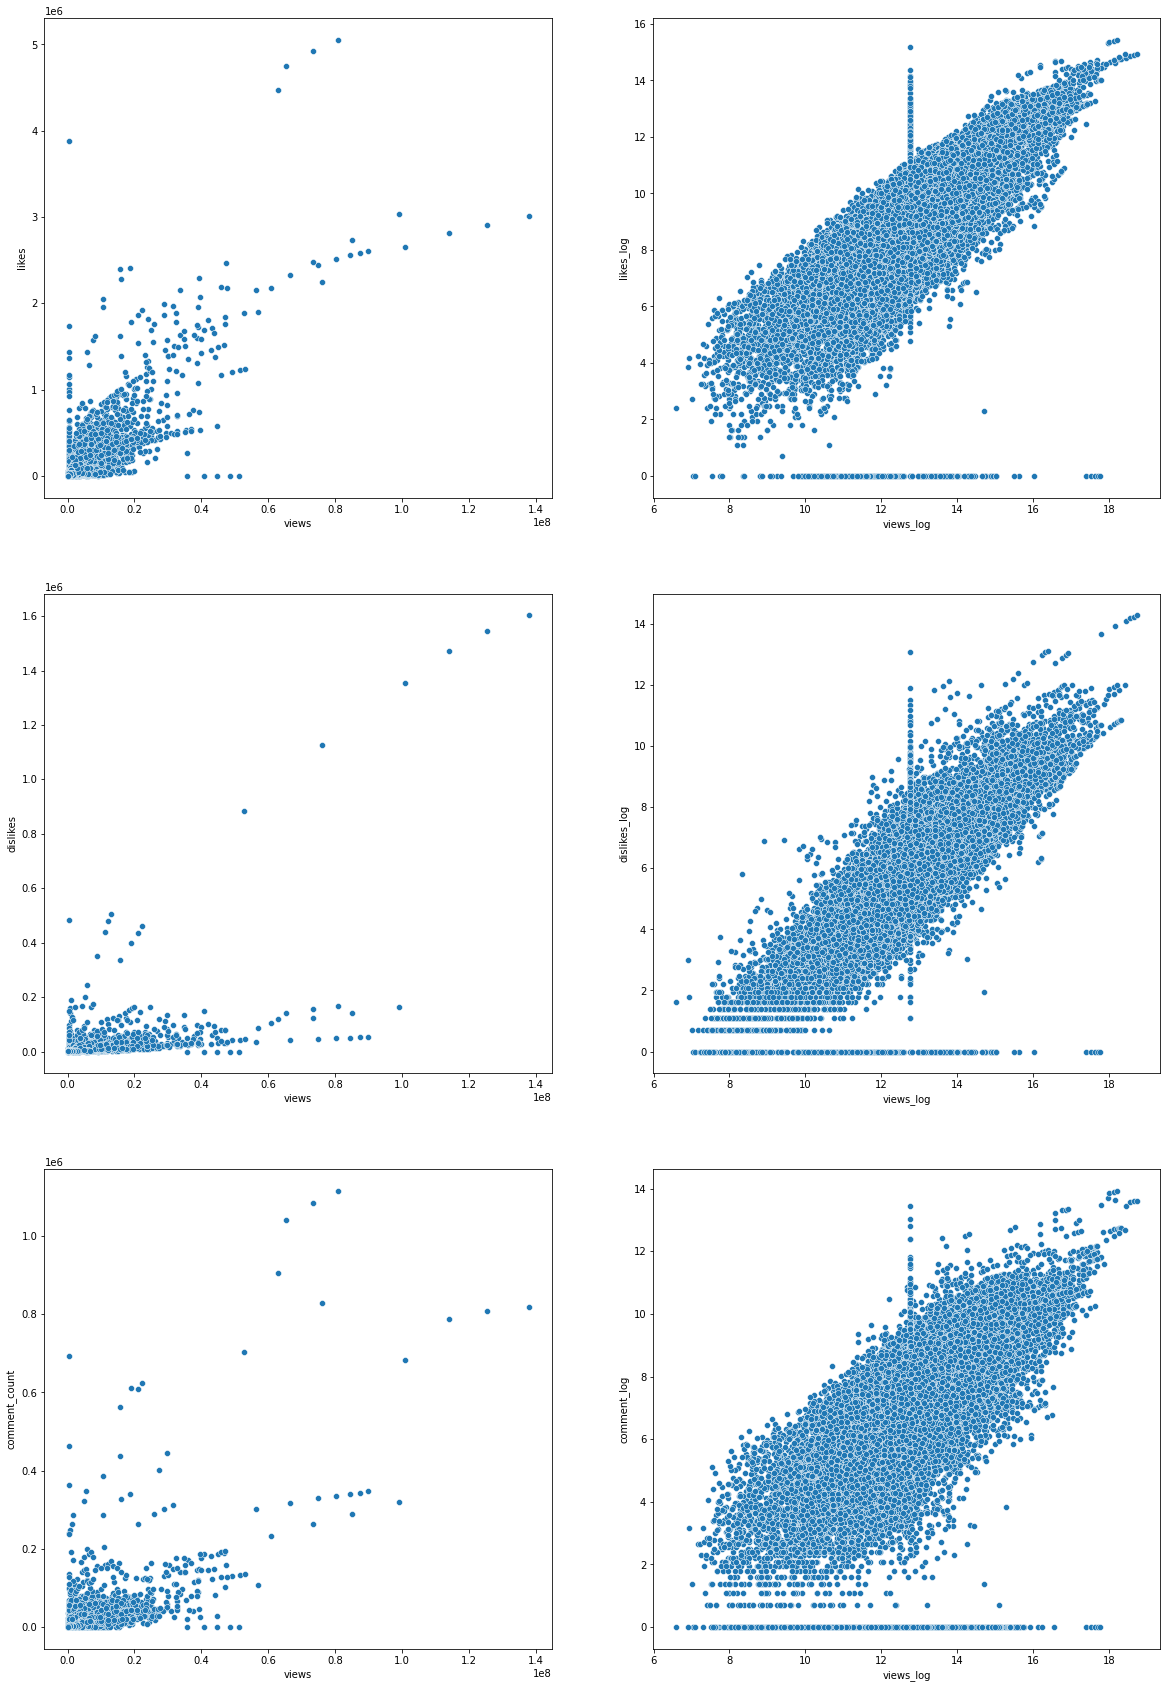

In [42]:
### EXERCISE CELL ###

plt.figure(figsize = (20,30))
plt.subplot(321)
sns.scatterplot(data = df_yout, x = "views", y = "likes")
plt.subplot(322)
sns.scatterplot(data = df_yout, x = "views_log", y = "likes_log")
plt.subplot(323)
sns.scatterplot(data = df_yout, x = "views", y = "dislikes")
plt.subplot(324)
sns.scatterplot(data = df_yout, x = "views_log", y = "dislikes_log")
plt.subplot(325)
sns.scatterplot(data = df_yout, x = "views", y = "comment_count")
plt.subplot(326)
sns.scatterplot(data = df_yout, x = "views_log", y = "comment_log")

We can see that indeed, likes, dislikes and views seem to be correlated with the views. The correlation seems to be a bit stronger for dislikes and a bit weaker for comments.

### Correlations between variables

As a last exercise of this tutorial, we want to introduce correlation matrices. Pandas [corr function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) allows you to easily calculate correlations between columns of a dataframe, with the possibility to specify the method of correlation (e.g. pearson, kendall etc.). However, we are not interested in correlations between all columns of our YouTube dataframe, but only the ones related to views, likes, dislikes and comments. So before you calculate the correlations, extract a subset of only these columns. Finally, calculate the correlations and visualize them using a Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

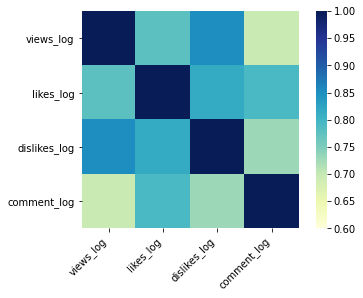

In [43]:
### EXERCISE CELL ###

df_interaction = df_yout[['views_log','likes_log','dislikes_log','comment_log']]

corr = df_interaction.corr()
ax = sns.heatmap(
    corr, 
    vmin=0.6, vmax=1,
    cmap="YlGnBu",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


The heatmap confirms our observations from the last section. We can see that the strongest correlations can be found between views and dislikes, while the correlation between comments and views is the weakest among all combinations (though still strongly correlated).

## Summary
---
In this notebook, we have seen several important aspects of data handling. We have shown how data can be parsed from JSON files. We have illustrated how missing data can be deleted or imputed with reasonable values. We have shown how different representations can help you gain more insight into datasets, in order to apply appropriate data cleaning methods. Many ideas of the data cleaning procedure described in this notebook can be adapted to other projects. However, always keep in mind that each data set is different and it is crucial to gain as much knowledge about your data as best as possible in order to handle it appropriately. Finally, we have shown some examples of plots (histograms, boxplots, scatter plots and heatmaps) that can help you in exploratory data analysis. In this context, we have also introduced the log transformation as a way to make differences in right skewed data more visible.